## MF731 Homework 1 Part 2 
### Edited by Xuyang Liu

#### 1. Loss Distributions for a Hedged Put Option

In [5]:
# Problem 1 (b)
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
mu = 0.16905
sigma = 0.4907
r = 0.0011888
t = 0
T = 0.291667
delta = 10/252
S0 = 152.51
K = 170
M = 100

def PBS(St,t):
    
    d1 = 1/(sigma * ((T-t)**0.5)) * (np.log(St/K) + (r + 0.5 * sigma**2) * (T-t))
    d2 = d1 - sigma * ((T-t)**0.5)
    p = St * (norm.cdf(d1)-1) + K * np.exp(-r * (T-t)) * (1-norm.cdf(d2))
    return p

def BS(St,t):
    d1 = 1/(sigma * ((T-t)**0.5)) * (np.log(St/K) + (r + 0.5 * sigma**2) * (T-t))
    d2 = d1 - sigma * (T-t)**0.5
    p = St * (norm.cdf(d1)-1) + K * np.exp(-r * (T-t)) * (1-norm.cdf(d2))
    lamda = norm.cdf(d1) - 1
    gamma = norm.pdf(d1)/(St * sigma * (T-t)**0.5)
    theta = -sigma/(2 * (T-t)**0.5) * St * norm.pdf(d1) + K * r * np.exp(-r * (T-t)) * (1-norm.cdf(d2))
    return p,lamda,gamma,theta


pbs,lamda,gamma,theta = BS(S0,t)



def simulation(N,types):
    
    rlist = []

    for i in range(N):
        X = np.random.normal((mu-0.5*sigma**2) * delta,(sigma**2) * delta)
        St = S0 * np.exp(X)
        if types == 'Full':
            Full_loss = -M * (lamda*(St - S0) - (PBS(St,t+delta)-PBS(S0,t)) )
            rlist.append(Full_loss)
        elif types == "Linear":
            linear_loss = M * theta * delta
            rlist.append(linear_loss)
        elif types == "Second":
            second_loss = M * (theta * delta + 0.5 * S0 * S0 * gamma * X**2)
            rlist.append(second_loss)
    return rlist
   



In [8]:
pbs,lamda

(27.098959883059933, -0.6086744776753927)

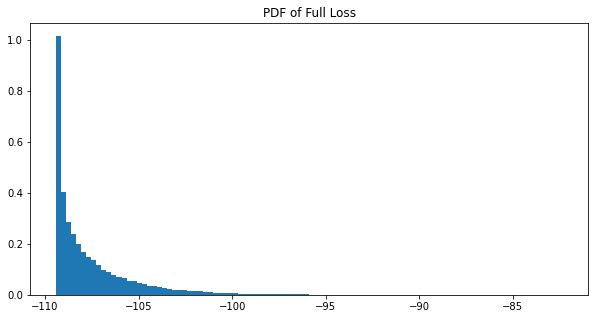

In [3]:
r1 = simulation(100000,"Full")
#plt.subplot(222)
#hist, bin_edges = np.histogram(r)
#plt.plot(hist)
plt.figure(figsize=(10,5))
plt.title('PDF of Full Loss')
plt.hist(r1,bins=100,density=True)
plt.show()

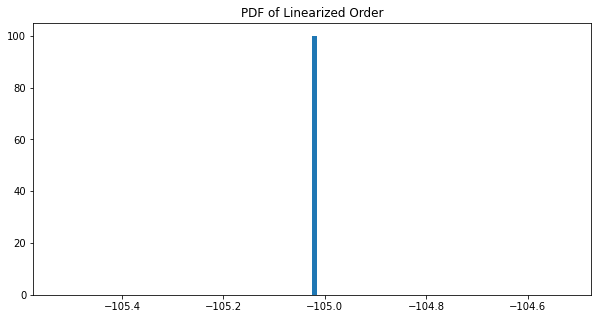

In [4]:
r2 = simulation(10000,"Linear")
plt.figure(figsize=(10,5))
plt.title('PDF of Linearized Order')
plt.hist(r2,bins=100,density=True)
plt.show()

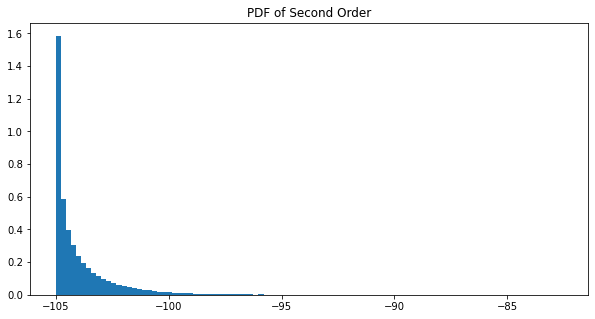

In [5]:
r3 = simulation(100000,"Second")
plt.figure(figsize=(10,5))
plt.title('PDF of Second Order')
plt.hist(r3,bins=100,density=True)
plt.show()

From the plot we can see that lienar one is a constant, while the Full and the second one are really similar.